<img src="https://i.pinimg.com/originals/81/0d/14/810d14dc8fc8a176bc040852693621f5.jpg"></img>

# <center>EDA Project on IPL Dataset</center> 

# Table Of Contents<br>
1. [Preparing Notebook](#1)<br>
2. [Loading Data and Preprocessing](#2)<br>
   - 2.1. [Loading Data and Basic info about the data](#2_1)<br>
   - 2.2. [Describe and find info about the data](#2_3)<br>
   - 2.3. [Data Pre profiling](#2_4)<br>
   - 2.4. [Drop id, date and umpire3 column](#2_5)<br>
   - 2.5. [Fill missing values in City column](#2_6)<br>
   - 2.6. [Fill null values for remaining values](#2_7)<br>
   - 2.7. [Fix Raising Pune Suergiants name in data](#2_9)<br>
   - 2.8. [Data Post Profiling](#2_8)<br>
   <br>
3. [EDA on IPL data](#3)<br>
    - 3.1. [Univariate Analysis](#3_1)<br>
        - 3.1.1. [What are the different teams played in IPL?](#3_1_1)<br>
        - 3.1.2. [which are top 5 cities where maximum number of matches are played ?](#3_1_2)<br>
        - 3.1.3. [How many matches played in each seasons of IPL ?](#3_1_3)<br>
        - 3.1.4. [What has been the major decesion when toss is won ?](#3_1_4)<br>
        - 3.1.5. [Which have been top teams who have won the toss maximum number of times ?](#3_1_5)<br>
        - 3.1.6. [What are the top 5 venues where matches have been played ?](#3_1_6)<br>
        - 3.1.7. [Which are top 3 teams which have won maximum matches ?](#3_1_7)<br>
        - 3.1.8. [How many matches have been no_result or draw?](#3_1_8)<br>
        - 3.1.9. [How many matches have won batting first and won batting second ?](#3_1_9)<br>
        - 3.1.10. [Who have done umpring maximum number of times ?](#3_1_10)<br>
        - 3.1.11. [Which team has played maximum matches ?](#3_1_11)<br>

In [2]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True) 

In [3]:
!pip install plotly --upgrade
!pip install chart-studio


     |████████████████████████████████| 7.3MB 13kB/s  eta 0:00:01
  Found existing installation: plotly 4.2.1
    Uninstalling plotly-4.2.1:
      Successfully uninstalled plotly-4.2.1
     |████████████████████████████████| 81kB 275kB/s eta 0:00:01


In [4]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

<a id='2'></a>
# 2. Data Preprocessing

<a id='2_1'></a>
## 2.1 Loading Data.

In [5]:
df_matches = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv',sep=',')
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
#df_matches.set_index('id',inplace=True)
#df_matches.head()

<a id='2_3'></a>
## 2.2. Describe and find info about the data.

In [7]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [8]:
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [9]:
df_matches.isnull().sum()

id                 0  
season             0  
city               7  
date               0  
team1              0  
team2              0  
toss_winner        0  
toss_decision      0  
result             0  
dl_applied         0  
winner             3  
win_by_runs        0  
win_by_wickets     0  
player_of_match    3  
venue              0  
umpire1            1  
umpire2            1  
umpire3            636
dtype: int64

<a id='2_4'></a>
## 2.3. Data pre profiling.
Let us explore more about the data (Profiling).

In [10]:
!pip install pandas-profiling --upgrade

     |████████████████████████████████| 133kB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 614kB 3.9MB/s eta 0:00:01
     |████████████████████████████████| 235kB 3.0MB/s eta 0:00:01


  Using cached https://files.pythonhosted.org/packages/74/3d/1ee25a26411ba0401b43c6376d2316a71addcc72ef8690b101b4ea56d76a/zipp-0.6.0-py2.py3-none-any.whl
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=148431 sha256=9b36748d74c60879a0daadb0d10474efac38b2c75b15f304f9fa3bba5ecd6e48
  Stored in directory: /home/nbuser/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27185 sha256=4fb7465ae34ab0316c2c432f6e7f2858c773cc0d26fc2068edb678a8017438c8
  Stored in directory: /home/nbuser/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for confuse: filename=confuse-1.0.0-cp36-none-any.whl size=19566 sha256=2c1fd50346399b821a73448ab2903780fd71ce4c1260eb31388388c96e174f1c
  Stored in directory: /home/nbuser/.cache/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pan

In [11]:
import pandas_profiling 


profile = df_matches.profile_report(title="IPL Matches Data before Data Preprocessing",correlations={"cramers": False})
profile.to_file(output_file="ipl_matches_profiling_before_preprocessing.html")

## Info from profiling.
1. <b>Date</b> column has very high cardinalty (498), Let's drop the column.
2. <b>City</b> also has 7 missing values, we can get try to get the city from Venue.
3. <b>umpire3</b> has Lot of missing values, we don't have any other info from where we can get the umpire3 details. 
So let's  drop that column.
4. <b>win_by_runs</b> columns has 54.7% of zeros, this can be because the match would have been won by wickets.
5. Zeros in <b>win_by_wickets</b> column could also mean the same, i.e. match would have been won by runs.
6. <b>Id</b> columns had different ranges, so we choose to drop the column.

<a id='2_5'></a>
## 2.4. Drop id, date and umpire3 column. 

In [12]:
df_matches.drop(['id','date','umpire3'],axis=1,inplace=True)
df_matches.head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


<a id='2_6'></a>
## 2.5. Fill missing values in City column.

In [13]:
df_matches[df_matches.city.isnull()].venue.unique()

array(['Dubai International Cricket Stadium'], dtype=object)

##### It means that the city is missing for those columns with venue as 'Dubai International Cricket Stadium'

#### Lets check if anywhere in the data we have the city for this stadium

In [14]:
df_matches[df_matches.venue=='Dubai International Cricket Stadium'].city.unique()

array([nan], dtype=object)

#### No we don't have the City for this venue. Then Lets just put the city as Dubai.

In [15]:
df_matches.loc[df_matches.city.isnull(),'city'] = 'Dubai'

In [16]:
df_matches[df_matches.venue=='Dubai International Cricket Stadium'].head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,2014,Dubai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,2014,Dubai,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,2014,Dubai,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,2014,Dubai,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,2014,Dubai,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus


In [17]:
df_matches.isnull().sum()

season             0
city               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

##### From the above data,we confirm that there exist no null values for city now.

<a id='2_7'></a>
## 2.6. Fill null values for remaining values.
Let's find out the reason, and try to eliminate the null values for 'winner','player_of_match','umpire1','umpire2'

In [18]:
df_matches[df_matches.winner.isnull()]

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,2011,Delhi,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,2015,Bangalore,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,2015,Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


Matches for no result have 'winner' and 'player_of_match' as null. 
Here are some of the choices i have to fill these null values.

1. Drop these columns, as they constitute very small percentage in data.
2. Replace the null values with some other value such as 'Not decided'.
3. Replace the 'winner' with team which has won more matches agaisnt each other, and 'player_of_match' as most number of times player_of_match name in a winning team.

The last solution might make data little more complicated, and we might land in situations as follows.

1. what if number of matches won against eachother is same.
2. what if number of palyer_of_match is maximum and equal for more than one player.
       
So i will choose the (2). and replace null values as not decided.


In [19]:
df_matches.loc[df_matches.winner.isnull(),['winner','player_of_match']] = 'undecided'
df_matches.loc[df_matches.result=='no result']

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,2011,Delhi,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,undecided,0,0,undecided,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,2015,Bangalore,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,undecided,0,0,undecided,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,2015,Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,undecided,0,0,undecided,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


#### Now lets check where is umpire1 and umpire2 missing in data.

In [20]:
df_matches[df_matches.umpire2.isnull()]

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


##### umpire1 and umpire2 are missing for same match, lets see the value counts and replace it with most frequent accurance of umpire.

In [21]:
ump1 = df_matches.umpire1.value_counts().head(1).index
ump2 = df_matches.umpire2.value_counts().head(1).index
df_matches.loc[df_matches.umpire1.isnull(),'umpire1'] = ump1
df_matches.loc[df_matches.umpire2.isnull(),'umpire2'] = ump2
df_matches.head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi


In [22]:
df_matches.isnull().sum()

season             0
city               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

<a id='2_9'></a>
## 2.7. Fix Raising Pune Suergiants name in data

In [37]:
df_matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [45]:
df_matches.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace=True)
df_matches['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala'], dtype=object)

### Hurray! No missing data at all now.

<a id='2_8'></a>
## 2.8. Data post profiling.
Lets do post profiling and get the profiling info of the current data.

In [23]:
import pandas_profiling 


profile = df_matches.profile_report(title="IPL Matches Data After Data Preprocessing",correlations={"cramers": False})
profile.to_file(output_file="ipl_matches_profiling_after_preprocessing.html")

### Data Looks much cleaner Let's proceed with EDA.


<a id='3'></a>    
# 3. EDA on IPL data
et's perform EDA on the preprocessed data.

In [46]:
df_matches.head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2017,Pune,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,2017,Indore,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi


<a id='3_1'></a>
## 3.1. Univariate Analysis

<a id='3_1_1'></a>
### 3.1.1. What are the different teams played in IPL?

In [47]:
unq_t1 = df_matches.team1.unique()
unq_t2 = df_matches.team2.unique()
unq = np.concatenate((unq_t1,unq_t2),axis=0)
print(np.unique(unq))

['Chennai Super Kings' 'Deccan Chargers' 'Delhi Daredevils'
 'Gujarat Lions' 'Kings XI Punjab' 'Kochi Tuskers Kerala'
 'Kolkata Knight Riders' 'Mumbai Indians' 'Pune Warriors'
 'Rajasthan Royals' 'Rising Pune Supergiants'
 'Royal Challengers Bangalore' 'Sunrisers Hyderabad']


##### The differrent teams played in IPL are as follows :
1. Chennai Super Kings
2. Deccan Chargers
3. Delhi Daredevils
4. Gujarat Lions
5. Kings XI Punjab
6. Kochi Tuskers Kerala
7. Kolkata Knight Riders
8. Mumbai Indians
9. Pune Warriors
10. Rajasthan Royals
11. Rising Pune Supergiants
12. Royal Challengers Bangalore
13. Sunrisers Hyderabad

<a id='3_1_2'></a>
### 3.1.2. which are top 5 cities where maximum number of matches are played ?

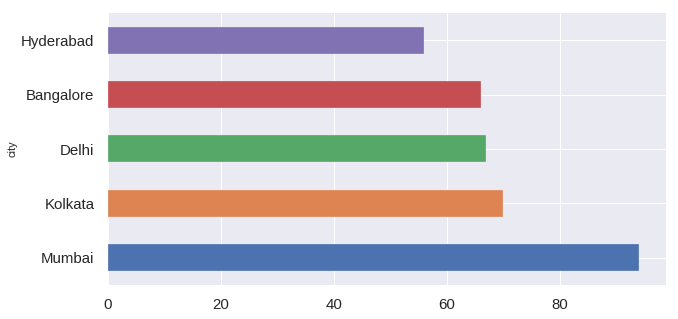

In [48]:
df_matches.groupby('city')['season'].count().sort_values(ascending=False)[:5].plot(kind='barh', figsize=(10,5), fontsize=15)

##### The Top Cities where maximum matches played are :
1. Mumbai.
2. Kolkata.
3. Delhi.
4. Bangalore.
5. Hydrabad.

<a id='3_1_3'></a>
### 3.1.3. How many matches played in each seasons of IPL ?

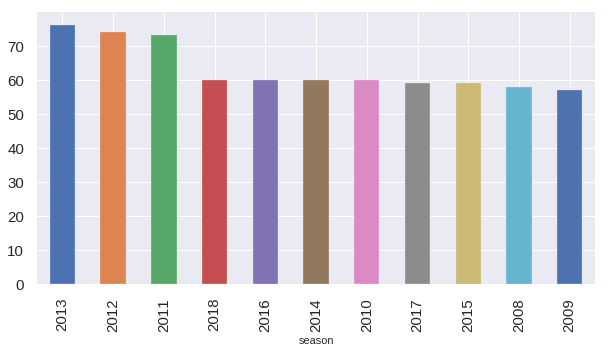

In [49]:
df_matches.groupby('season')['city'].count().sort_values(ascending=False).plot('bar', figsize=(10,5), fontsize=15)

##### From above figure we can say that highest number of matches were played in 2013, and lowest number of matches were played in 2009. 

<a id='3_1_4'></a>
### 3.1.4. What has been the major decesion when toss is won ?

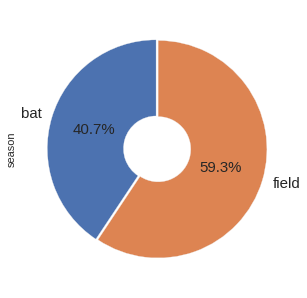

In [50]:
df_matches.groupby('toss_decision')['season'].count().plot(kind='pie', figsize=(5,5), fontsize=15, autopct='%3.1f%%', wedgeprops=dict(width=0.7), explode=[0.01, 0.01], startangle=90)

From above chart we can see that the teams winning the toss have selected to field i.e. <b>59.3%</b>.<br>
<b>40.7%</b> of the times the teams have selected to bat.

<a id='3_1_5'></a>
### 3.1.5. Which have been top teams who have won the toss maximum number of times ?

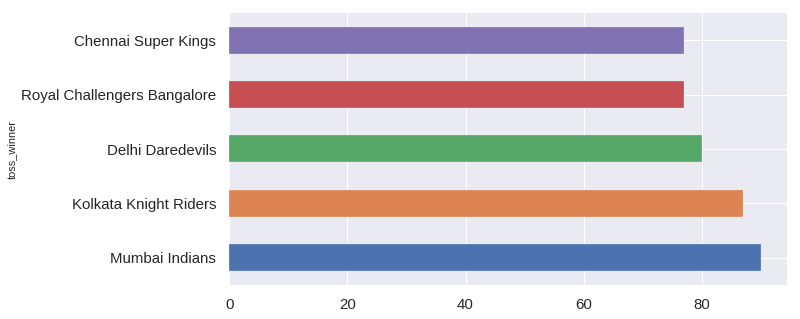

In [51]:
df_matches.groupby('toss_winner')['season'].count().sort_values(ascending=False)[:5].plot(kind='barh', figsize=(10,5), fontsize=15)

From the above figure it is clear than <b>Mumbai Indians</b> and <b>Kokata Knight Riders</b> have won the toss maximum number of times.

<a id='3_1_6'></a>
### 3.1.6. What are the top 5 venues where matches have been played ?

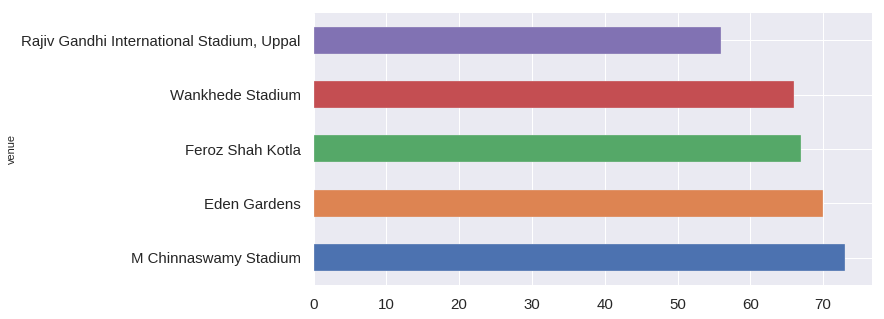

In [53]:
df_matches.groupby('venue')['season'].count().sort_values(ascending=False)[:5].plot(kind='barh', figsize=(10,5), fontsize=15)

The above graph represent the top 5 venue's where maximum matches have been played.<br> <b>M Chinnaswamy Stadium</b> being the Top venue.

<a id='3_1_7'></a>
### 3.1.7. Which are top 3 teams which have won maximum matches ?

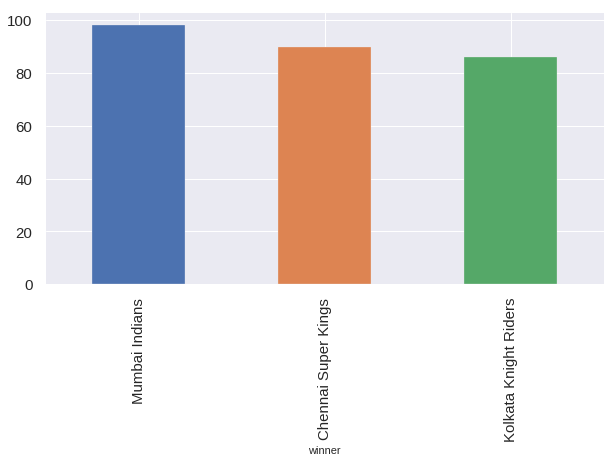

In [54]:
df_matches.groupby('winner')['season'].count().sort_values(ascending=False)[:3].plot(kind='bar', figsize=(10,5), fontsize=15)

The above are teams that have won maximum number of matches.<br> <b>Mumbai Indians</b> being the top team. 

<a id='3_1_8'></a>
### 3.1.8. How many matches have been no_result or draw?

result
no result    3  
normal       686
tie          7  
Name: season, dtype: int64


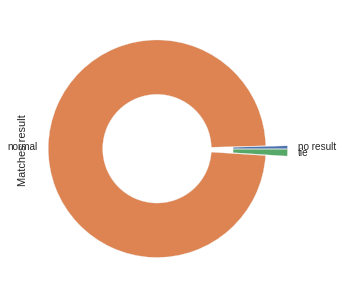

In [55]:
results_df = df_matches.groupby('result')['season'].count()
print(results_df)
results_df.plot(kind='pie', figsize=(5,5), fontsize=10, wedgeprops=dict(width=0.5), explode=[0.1, 0.1,0.1], startangle=0, label='Matches result ')


From above we confirm the that <b>7 - Tie</b> and <b>3 - no result</b>.

<a id='3_1_9'></a>
### 3.1.9. How many matches have won batting first  and won batting second ?

([<matplotlib.patches.Wedge at 0x7f6e78ab1f60>,
 [Text(-1.1108048108297768, 0.14322245716864462, 'Won_batting_First'),
  Text(1.1108047974203177, -0.14322256116969673, 'Won_batting_Second')],
 [Text(-0.6149098059950548, 0.07928386021835682, '45.9%'),
  Text(0.6149097985719615, -0.07928391779036782, '54.1%')])

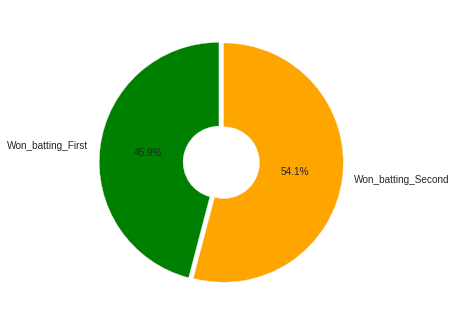

In [56]:
w_b_r = df_matches[df_matches.win_by_runs > 0]['season'].count()
w_b_w = df_matches[df_matches.win_by_wickets > 0]['season'].count()

plt.pie([w_b_r,w_b_w], autopct='%1.1f%%', explode=[0.02,0.02], startangle=90, colors=['green','Orange'], wedgeprops=dict(width=0.7), labels=['Won_batting_First','Won_batting_Second'])

From the above figure we can say the most of the time the teams have won <b>batting second</b>.<br>
<b>54.1%  -  Batting second</b><br>
<b>45.9%  -  Batting First</b>

<a id='3_1_10'></a>
### 3.1.10. Who have done umpring maximum number of times ?

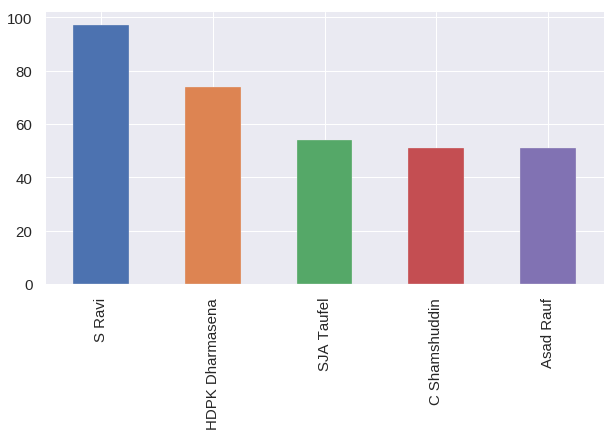

In [57]:
top_1 = df_matches.groupby('umpire1')['season'].count().sort_values(ascending=False)[:5]
top_2 = df_matches.groupby('umpire2')['season'].count().sort_values(ascending=False)[:5]
top_1.add(top_2, fill_value=0).sort_values(ascending=False)[:5].plot(kind='bar', figsize=(10,5), fontsize=15)


The above are the top 5 Umpries who have done umpiring for maximum number of times with <b>S Ravi</b> umpiring in most of the matches.

<a id='3_1_11'></a>
### 3.1.11. Which team has played maximum matches ?

In [58]:
max_1 = df_matches.groupby('team1')['season'].count().sort_values(ascending=False)
max_2 = df_matches.groupby('team2')['season'].count().sort_values(ascending=False)
max_1.add(max_2, fill_value=0).sort_values(ascending=False)[:5]

Mumbai Indians                 171
Royal Challengers Bangalore    166
Kolkata Knight Riders          164
Kings XI Punjab                162
Delhi Daredevils               161
Name: season, dtype: int64

The above mentioned are the top 5 teams who have played most number of matches with <b>Mumbai Indains</b> playine most number of matches